Fitting ExtraTreesClassifier on faces data with 1 cores...
done in 1.347


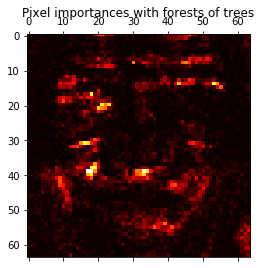

In [6]:
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

n_jobs = 1

data = fetch_olivetti_faces()
X, y = data.data, data.target

mask = y < 5 #limit to 5 class
X = X[mask]
y = y[mask]

#build a forest and compute the pixel importances
print('Fitting ExtraTreesClassifier on faces data with %d cores...' %n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000, 
                            max_features=129,
                            n_jobs = n_jobs,
                            random_state=0)
forest.fit(X,y)
print("done in %0.3f" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

#plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()